In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('U:\\Project\\GDP.csv', header=7)  #

df = df.drop(columns=['Line', 'Unnamed: 2']) 
df = df.rename(columns={'Unnamed: 1': 'Time'})

df.head()

,Time,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Gross domestic product,"104,556","92,160","77,391","59,522","57,154","66,800","74,241","84,830","93,003",...,"14,992,052","15,542,582","16,197,007","16,784,851","17,527,258","18,224,780","18,715,040","19,519,424","20,580,223","21,427,690"
1,Personal consumption expenditures,"77,382","70,136","60,672","48,714","45,945","51,461","55,932","62,188","66,839",...,"10,185,836","10,641,109","11,006,814","11,317,210","11,822,753","12,284,281","12,748,483","13,312,060","13,998,666","14,562,662"
2,Goods,"43,770","38,164","31,709","24,127","23,756","28,483","31,628","35,969","38,373",...,"3,317,825","3,518,121","3,637,739","3,729,973","3,862,956","3,920,335","3,995,905","4,165,019","4,364,783","4,504,964"
3,Durable goods,"9,829","7,661","5,911","3,959","3,762","4,564","5,493","6,749","7,393",...,"1,048,962","1,093,499","1,144,221","1,189,413","1,242,075","1,305,897","1,352,645","1,412,570","1,475,585","1,526,830"
4,Nondurable goods,"33,941","30,503","25,798","20,169","19,994","23,919","26,135","29,221","30,980",...,"2,268,862","2,424,622","2,493,518","2,540,559","2,620,881","2,614,438","2,643,260","2,752,450","2,889,199","2,978,133"


In [3]:
# make sure index is Time
df.set_index('Time', inplace=True)

df = df.transpose()

print('The index is:', df.index, '\n')
# print('The columns are:', df.columns)

df.head(5)

The index is: Index(['1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946',
       '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object') 



Time,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local
1929,"104,556","77,382","43,770","9,829","33,941","33,613","17,170","15,630","11,560","5,491",...,"5,347",592,"5,556","4,463","1,093","9,622","1,907","1,056",851,"7,714"
1930,"92,160","70,136","38,164","7,661","30,503","31,972","11,428","11,651","9,184","4,448",...,"3,929",515,"4,121","3,104","1,017","10,273","2,017","1,090",926,"8,256"
1931,"77,391","60,672","31,709","5,911","25,798","28,963","6,549","7,661","5,762","2,619",...,"2,494",412,"2,905","2,120",785,"10,169","2,067","1,081",986,"8,102"
1932,"59,522","48,714","24,127","3,959","20,169","24,587","1,819","4,169","3,294","1,392",...,"1,667",308,"1,932","1,343",589,"8,946","2,006","1,051",955,"6,940"
1933,"57,154","45,945","23,756","3,762","19,994","22,189","2,276","3,680","2,955","1,091",...,"1,736",251,"1,929","1,510",419,"8,875","2,458",999,"1,459","6,417"


In [4]:
# Set index as a date time object

df.index = pd.to_datetime(df.index)
print(df.index)
df.sample(5)

DatetimeIndex(['1929-01-01', '1930-01-01', '1931-01-01', '1932-01-01',
               '1933-01-01', '1934-01-01', '1935-01-01', '1936-01-01',
               '1937-01-01', '1938-01-01', '1939-01-01', '1940-01-01',
               '1941-01-01', '1942-01-01', '1943-01-01', '1944-01-01',
               '1945-01-01', '1946-01-01', '1947-01-01', '1948-01-01',
               '1949-01-01', '1950-01-01', '1951-01-01', '1952-01-01',
               '1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01',
               '1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
      

Time,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local
1958-01-01,"481,229","295,606","161,568","39,530","122,038","134,038","70,947","71,313","48,491","17,629",...,"16,414","4,146","20,022","12,951","7,071","114,138","71,521","62,220","9,301","42,617"
1959-01-01,"521,654","317,130","172,607","44,888","127,719","144,523","85,669","81,752","53,124","18,149",...,"16,458","6,267","22,328","15,310","7,018","118,458","73,579","60,945","12,633","44,879"
2014-01-01,"17,527,258","11,822,753","3,862,956","1,242,075","2,620,881","7,959,797","3,044,178","2,960,212","2,400,057","577,624",...,"1,614,954","756,749","2,879,362","2,391,555","487,807","3,167,985","1,215,002","743,418","471,584","1,952,983"
1944-01-01,"224,447","108,648","60,531","7,743","52,788","48,117","9,180","10,104","8,608","2,369",...,"3,589","1,291","6,904","3,813","3,091","108,643","100,086","97,272","2,814","8,558"
1995-01-01,"7,639,749","4,962,590","1,815,533","635,738","1,179,795","3,147,057","1,317,489","1,286,316","962,247","207,270",...,"592,442","220,369","902,572","757,449","145,123","1,449,431","576,682","377,159","199,523","872,749"


In [5]:
# df['Unnamed: 1'] = df.rename(df['Indicator']) #trying to rename 'Unnamed: 1' to something useful
#df.set_index('Unnamed: 1', inplace=True)  

In [6]:
# Variables we want 
keep_var = (['    Gross domestic product', 'Personal consumption expenditures', 'Gross private domestic investment', 'Government consumption expenditures and gross investment'])
df_keep = df[keep_var]
df_keep.sample(5)
# Variables we want to keep for model
# keep_var = (['', 'Personal consumption expenditures', 'Gross private domestic investment', 'Change in private inventories', 'Government consumption expenditures and gross investment'])
# df_keep = df[keep_var]


Time,Gross domestic product,Personal consumption expenditures,Gross private domestic investment,Government consumption expenditures and gross investment
1985-01-01,"4,338,979","2,712,830","829,650","910,516"
1976-01-01,"1,873,412","1,147,666","323,224","404,153"
1930-01-01,"92,160","70,136","11,428","10,273"
1993-01-01,"6,858,559","4,451,984","1,106,826","1,364,922"
1931-01-01,"77,391","60,672","6,549","10,169"


In [7]:
df_keep.columns

Index(['    Gross domestic product', 'Personal consumption expenditures',
       'Gross private domestic investment',
       'Government consumption expenditures and gross investment'],
      dtype='object', name='Time')

In [8]:
df_keep = df_keep.rename(columns={'    Gross domestic product':'GDP', 'Personal consumption expenditures':'PCE', 'Gross private domestic investment':'GPDI', 'Government consumption expenditures and gross investment':'Gov Cons'})
df_keep.sample(10)

Time,GDP,PCE,GPDI,Gov Cons
1942-01-01,"165,952","89,002","11,762","65,440"
2001-01-01,"10,581,822","7,065,634","1,934,842","1,949,275"
1995-01-01,"7,639,749","4,962,590","1,317,489","1,449,431"
1929-01-01,"104,556","77,382","17,170","9,622"
1969-01-01,"1,017,615","603,639","173,562","238,984"
1985-01-01,"4,338,979","2,712,830","829,650","910,516"
1962-01-01,"603,921","362,557","96,977","140,287"
1980-01-01,"2,857,307","1,750,667","530,098","589,598"
2009-01-01,"14,448,932","9,842,209","1,929,664","3,073,512"
1992-01-01,"6,520,327","4,197,559","1,013,006","1,344,500"


In [9]:
print(df_keep.dtypes)

df_keep.astype(str)
df_keep['GDP'] = df_keep['GDP'].str.replace(',', '').astype(int)
df_keep['PCE'] = df_keep['PCE'].str.replace(',', '').astype(int)
df_keep['GPDI'] = df_keep['GPDI'].str.replace(',', '').astype(int)
df_keep['Gov Cons'] = df_keep['Gov Cons'].str.replace(',', '').astype(int)

print(df_keep.dtypes)
df_keep.sample(5)

Time
GDP         object
PCE         object
GPDI        object
Gov Cons    object
dtype: object
Time
GDP         int32
PCE         int32
GPDI        int32
Gov Cons    int32
dtype: object


Time,GDP,PCE,GPDI,Gov Cons
1968-01-01,940651,556852,156923,225526
1986-01-01,4579631,2886278,849146,976076
1971-01-01,1164850,699937,196824,267468
1996-01-01,8073122,5244596,1432055,1492848
2003-01-01,11458246,7723109,2027056,2211208


In [10]:
unemp_df = pd.read_csv('U:\\Project\\Unemp_rate.csv', header=2)

#unemp_df = unemp_df.dropna(how='any')
unemp_df = unemp_df.rename(columns={'Unemployment Rate (as of Dec.)':'Unemp_rate'})

unemp_df.head()

,Year,Unemp_rate,GDP Growth,Inflation (Dec. YOY)
0,1929.0,0.03,NaN,0.01
1,1930.0,0.09,-0.09,-0.06
2,1931.0,0.16,-0.06,-0.09
3,1932.0,0.24,-0.13,-0.10
4,1933.0,0.25,-0.01,0.01


In [11]:
print(unemp_df.dtypes)
unemp_df = unemp_df.astype(str)
#unemp_df['Unemp_rate'] = unemp_df['Unemp_rate'].astype(int)
#unemp_df['Year'] = unemp_df['Year'].astype(int)
#print(unemp_df.dtypes)

#unemp_df.set_index('Year', inplace=True)

#print(unemp_df.index)
#unemp_df.index
#unemp_df.index = pd.to_datetime(unemp_df.index)

Year                    float64
Unemp_rate              float64
GDP Growth              float64
Inflation (Dec. YOY)    float64
dtype: object


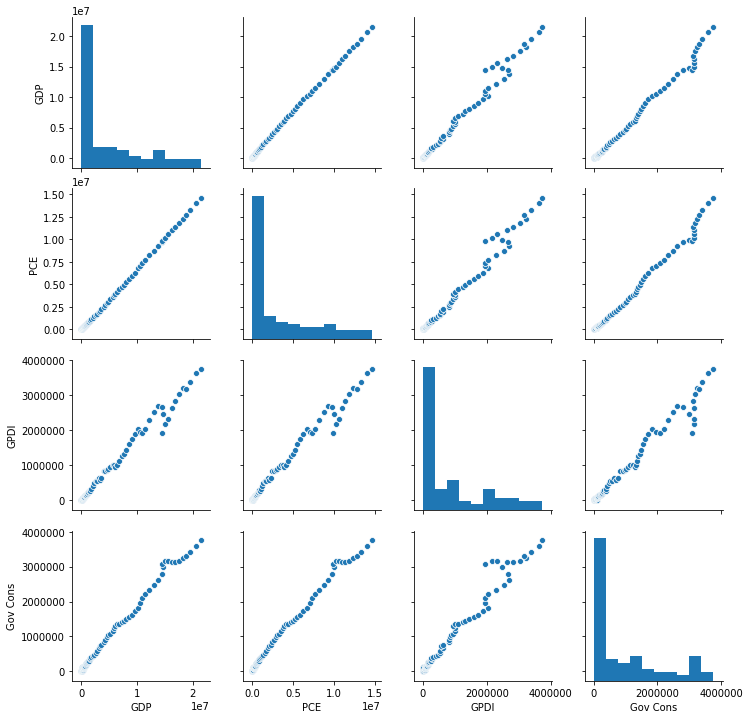

In [12]:
g = sns.pairplot(df_keep)